# KDD Cup 1999 Data (https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)

Conjunto de dados usado para a Terceira Competição Internacional de Ferramentas de Mineração de Dados e Descoberta de Conhecimento, que foi realizada em conjunto com a KDD-99, a Quinta Conferência Internacional sobre Descoberta de Conhecimento e Mineração de Dados.

* Adaptado do artigo "Cost-based Modeling and Evaluation for Data Mining With Application to Fraud and Intrusion Detection: Results from the JAM Project", de Salvatore J. Stolfo, Wei Fan, Wenke Lee, Andreas Prodromidis e Philip K. Chan.

* Uma conexão é uma sequência de pacotes TCP começando e terminando em alguns momentos bem definidos, entre os quais os dados fluem de e para um endereço IP de origem para um endereço IP de destino sob algum protocolo bem definido. Cada conexão é rotulada como normal ou como um ataque, com exatamente um tipo de ataque específico. Cada registro de conexão consiste em cerca de 100 bytes.

## Objetivo:

Construir um modelo preditivo, baseado em classificação, capaz de distinguir entre conexões "ruins", que são os ataques, das conexões "boas" ou normais.

## Dataset:

O dataset foi preparado pelo MIT Lincoln Labs através de intrusões simuladas em um ambiente de rede militar, em 1998, e possui as seguintes características:
colunas = 42
Linhas = 4.898.429

## Ataques:

Os ataques se enquadram em quatro categorias principais:

- DOS: negação de serviço, por exemplo inundação de syn (syn flood);
- R2L: acesso não autorizado de uma máquina remota, por ex. adivinhando a senha;
- U2R: acesso não autorizado a privilégios de superusuário (root) local, por exemplo, vários ataques de "buffer overflow";
- Sondagem (Probing): vigilância e outra sondagem, por exemplo, varredura de porta.

## Descrição das Features: (obs: das 42 features, somente 31 são descritas abaixo. Segundo os autores, são features definidas para os registros de conexão:

#### Recursos básicos de conexões TCP individuais:

duration = comprimento (número de segundos) da conexão

protocol_type = tipo de protocolo, por ex. tcp, udp, etc.

service = serviço de rede no destino, por exemplo, http, telnet, etc.

src_bytes = número de bytes de dados da origem ao destino

dst_bytes = número de bytes de dados do destino à origem

flag = status normal ou de erro da conexão

land = 1 se a conexão for de/para o mesmo host/porta; 0 caso contrário

wrong_fragment = número de fragmentos "errados"

urgent = número de pacotes urgentes

#### Recursos de conteúdo em uma conexão sugerida pelo conhecimento do domínio:

hot = número de indicadores "quentes"

num_failed_logins = número de tentativas de login malsucedidas

logged_in = 1 se logado com sucesso; 0 caso contrário

num_compromised = número de condições "comprometidas"

root_shell = 1 se for obtido root shell; 0 caso contrário

su_attempted = 1 se o comando "su root" foi tentado; 0 caso contrário

num_root = número de acessos "root"

num_file_creations = número de operações de criação de arquivo

num_shells = número de prompts de shell

num_access_files = número de operações em arquivos de controle de acesso

num_outbound_cmds = número de comandos de saída em uma sessão ftp

is_hot_login = 1 se o login pertence à lista "hot"; 0 caso contrário

is_guest_login = 1 se o login for um "guest" login; 0 caso contrário

#### Recursos de tráfego calculados usando uma janela de tempo de dois segundos:

count = número de conexões com o mesmo host que a conexão atual nos últimos dois segundos

Observação: os recursos a seguir referem-se a essas conexões do mesmo host.

serror_rate = % de conexões que têm erros "SYN"

rerror_rate  = % de conexões que têm erros "REJ"

same_srv_rate = % de conexões para o mesmo serviço

diff_srv_rate = % de conexões para serviços diferentes

srv_count = número de conexões para o mesmo serviço que a conexão atual nos últimos dois segundos

Observação: os recursos a seguir referem-se a essas conexões do mesmo serviço.

srv_serror_rate = % de conexões que têm erros "SYN"

srv_rerror_rate = % de conexões que têm erros "REJ"

srv_diff_host_rate = % de conexões para diferentes hosts

#### Abaixo seguem as features sem descrição#

dst_host_count: continuous.

dst_host_srv_count: continuous.

dst_host_same_srv_rate: continuous.

dst_host_diff_srv_rate: continuous.

dst_host_same_src_port_rate: continuous.

dst_host_srv_diff_host_rate: continuous.

dst_host_serror_rate: continuous.

dst_host_srv_serror_rate: continuous.

dst_host_rerror_rate: continuous.

dst_host_srv_rerror_rate: continuous.

# Montando o Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Importando as bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, average_precision_score, roc_curve
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Manipulando o dataset original do KDD Cup 1999:

## Adicionando as colunas no dataset e salvando um novo dataset

In [ ]:
df = pd.read_csv("kddcup.data")

In [ ]:
headers = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack"]

In [ ]:
df.columns = headers

In [ ]:
df.head(5)

### Salvando o novo dataset com as colunas:

In [ ]:
file = "kddcup_data.csv"
df.to_csv(file, index=False)

# Trabalhando com o novo dataset (com as features):

## Lendo o dataset:

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/Data_Science/ml_anomaly_detection/kddcup_data.csv")
df = pd.read_csv("kddcup_data.csv")

## Overview dos dados e features:

In [ ]:
pd.set_option("max_columns", None)
overview = df
overview

## Verificando se há algum feature com valor zero ou vazio (False):

In [ ]:
df.any()

## Checando os tipos de dados (data types):

In [ ]:
df.dtypes

## Método que retorna um sumário estatístico (statistical summary) onde exibe somente as colunas que possuem números:

In [ ]:
df.describe()

## Método que retorna um sumário estatístico completo:
### Unique = número de objetos distintos na coluna
### Top = é o objeto mais frequente
### freq = é o número de vezes que o objeto superior aparece na coluna

In [ ]:
df.describe(include='all')

## Método que verifica o conjunto de dados

In [ ]:
df.info

## Listando as features não-numéricas:

In [ ]:
df.select_dtypes(exclude=[np.number])

## Listando os tipos de ataques, protocolos, serviços e flags:

In [ ]:
types_of_attacks = df['attack'].value_counts().to_frame()
types_of_attacks.head(23)

In [ ]:
types_of_protocols = df['protocol_type'].value_counts().to_frame()
types_of_protocols.head()

In [ ]:
types_of_services = df['service'].value_counts().to_frame()
types_of_services.head()

In [ ]:
types_of_flags = df['flag'].value_counts().to_frame()
types_of_flags.head()

## Scatterplot

### Obs: A visualização não ficou boa por causa da grande quantidade de tipos de ataques

In [ ]:
y=df['duration']
x=df['attack']
plt.scatter(x,y)

plt.title('Scatterplot Attack vs Duration')
plt.xlabel('Attack')
plt.ylabel('Duration')

## Verificando se existem células N/A e null no dataset:

In [ ]:
df.isna().sum()

In [ ]:
df.isnull().sum()

## Iniciando o tratamento dos dados:

### Convertendo a feature "attack", que possui 23 tipos, para binomial, ou seja, a feature "attack" só terá dois tipos: "normal" e "attack"

In [ ]:
df["attack"].loc[df["attack"] != "normal."] = "attack."

### Dados "attack" e "normal"

In [ ]:
sns.countplot(x='attack', data=df)

### Distribuição da feature 'attack'

In [ ]:
print("distribuição da feature 'attack': {}".format(Counter(df["attack"])))

### Proporção attack vs normal

In [ ]:
df.attack.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

### Usando a classe LabelEncoder para converter as features não-numéricas para numéricas ("protocol_type", "service", "flag" e "attack")

In [ ]:
le = LabelEncoder()

In [ ]:
df["protocol_type"] = le.fit_transform(df["protocol_type"])
df["service"] = le.fit_transform(df["service"])
df["flag"] = le.fit_transform(df["flag"])
df["attack"] = le.fit_transform(df["attack"])

In [ ]:
df.head(5)

### Exibindo os coeficientes de correlação entre as variáveis:

In [ ]:
df.corr()

### Excluindo a feature "num_outbound_cmds" que está com valor NaN:

In [ ]:
df.drop(["num_outbound_cmds"], axis=1, inplace=True)

### Salvando o novo dataset sem a feature "num_outbound_cmds":

In [ ]:
file = "/content/drive/MyDrive/Data_Science/ml_anomaly_detection/new_kddcup_data.csv"
df.to_csv(file, index=False)

# Manipulando o dataset "new_kddcup_data.csv":

In [2]:
#df = pd.read_csv("/content/drive/MyDrive/Data_Science/ml_anomaly_detection/new_kddcup_data.csv")
df = pd.read_csv("new_kddcup_data.csv")
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,24,9,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1
1,0,1,24,9,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,1
2,0,1,24,9,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,1
3,0,1,24,9,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,1
4,0,1,24,9,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,1


## Verificando se os dados estão balanceados:

Class 0: 3925650
Class 1: 972780
Proportion: 4.04 : 1


<AxesSubplot:title={'center':'Count (attack)'}>

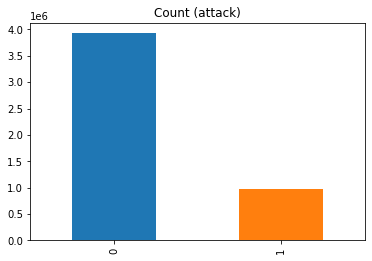

In [3]:
attack_count = df.attack.value_counts()
print('Class 0:', attack_count[0])
print('Class 1:', attack_count[1])
print('Proportion:', round(attack_count[0] / attack_count[1], 2), ': 1')
attack_count.plot(kind='bar', title='Count (attack)',color = ['#1F77B4', '#FF7F0E'])

## Plotando um Heatmap com as correlações entre as 41 features. As cores mais escuras simbolizam as features mais se correlacionam:

In [ ]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

# Testando a Precisão com os dados desbalanceados usando o Classificador Gradient Boosting:

## Dividindo os dados em Treinamento e Teste:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('attack', axis=1), df['attack'], test_size=0.2,  random_state=50)

print(f'X_train:\n{X_train}\n\nX_test:\n{X_test}\n\ny_train:\n{y_train}\ny_test:\n{y_test}')

X_train:
         duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
4022438         0              0       15     9        520          0     0   
1093648         0              1       49     5          0          0     0   
4195845         0              0       15     9        520          0     0   
4185494         0              0       15     9        520          0     0   
4215401         0              0       15     9        520          0     0   
...           ...            ...      ...   ...        ...        ...   ...   
1554661         0              0       15     9       1032          0     0   
2418654         0              0       15     9       1032          0     0   
677997          0              1       49     5          0          0     0   
1152480         0              1       49     5          0          0     0   
1980080         0              0       15     9       1032          0     0   

         wrong_fragment  urgent  hot  ... 

## Dimensionando os dados:

In [5]:
scaler = StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

print(f'Scaler:\n{scaler}\n\nX_train_transformed:\n{X_train_transformed}\n\nX_test_transformed:\n{X_test_transformed}')

Scaler:
StandardScaler()

X_train_transformed:
[[-0.06691307 -0.80550111 -0.69557793 ... -0.4653043  -0.25076467
  -0.24955808]
 [-0.06691307  0.94055651  1.59651726 ...  2.1518123  -0.25076467
  -0.24955808]
 [-0.06691307 -0.80550111 -0.69557793 ... -0.4653043  -0.25076467
  -0.24955808]
 ...
 [-0.06691307  0.94055651  1.59651726 ...  2.1518123  -0.25076467
  -0.24955808]
 [-0.06691307  0.94055651  1.59651726 ...  2.1518123  -0.25076467
  -0.24955808]
 [-0.06691307 -0.80550111 -0.69557793 ... -0.4653043  -0.25076467
  -0.24955808]]

X_test_transformed:
[[-0.06691307  0.94055651 -0.08884685 ... -0.4653043  -0.25076467
  -0.24955808]
 [-0.06691307 -0.80550111 -0.69557793 ... -0.4653043  -0.25076467
  -0.24955808]
 [-0.06691307 -0.80550111 -0.69557793 ... -0.4653043  -0.25076467
  -0.24955808]
 ...
 [-0.06691307 -0.80550111 -0.76299249 ... -0.4653043  -0.25076467
  -0.24955808]
 [-0.06691307  0.94055651  1.59651726 ...  2.1518123  -0.25076467
  -0.24955808]
 [-0.06691307  0.94055651  1.5

## Treinando o Gradient Boosting Classifier com hiperparâmetros e ajustando (.fit) os dados:

In [6]:
# Hiperparâmetros:
# learning_rate => controla a rapidez com que o modelo aprende. Quanto menor a taxa, mais lento o modelo aprende, porém, mais robusto e eficiente fica e evita overfitting.
# n_estimators => número de árvores usadas no modelo.
# Quanto menor o learning_rate, maior deve ser o n_estimators, porém, se não for ajustado corretamente, pode ocorrer overfitting.

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=5).fit(X_train_transformed, y_train)

0.03306875876556366

### Calculando o score do GBC:

In [16]:
# Método score retorna a precisão média nos dados de teste e rótulos fornecidos.
gbc_score = gbc.score(X_test, y_test)

print(f'Score:\n {gbc_score}')

Score:
 0.03306875876556366


## Matriz de Confusão:

Matriz de Confusão:
 [[785016     67]
 [   512 194091]]


Text(0.5, 0, 'Previsto')

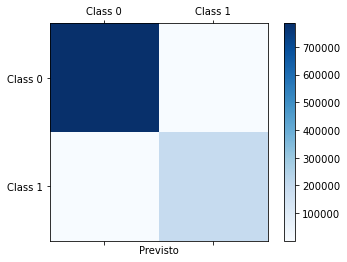

In [10]:
y_pred = gbc.predict(X_test_transformed)
conf_mat = confusion_matrix(y_pred, y_test)
print('Matriz de Confusão:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Previsto')

### Calculando a Precisão, Verdadeiro Negativo (TN), Falso Positivo (FP), Falso Negativo (FN) e Verdadeiro Positivo (TP):

In [11]:
#print('964.925 classificações corretas vs 14.761 classificações erradas')
# Casos Positivos Corretamente Identificados (CPCI) = TP
# Casos Positivos Previstos (CPP) = TP + FP
# Casos Positivos Reais (CPR) = TP + FN

threshold = 0.5
y_pred_class = y_pred > threshold
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()
accuracy = (tp + tn) / (tp + fp + fn + tn)

CPCI = tp
CPP = tp + fp
CPR = tp + fn
precisao = CPCI / CPP
recall = CPCI / CPR
f1score = 2 * ((precisao * recall) / (precisao + recall))
f1score_ = f1_score(y_test, y_pred)

print(f'A precisão é: %.2f%%' % (precisao * 100))
print(f'A taxa de Recall é: %.2f%%' % recall)
print(f'A quantidade de Casos Positivos Corretamente Identificados é {CPCI}')
print(f'F1_Score: {f1score}')
print(f'F1_Score: {f1score_}')
print(f'A precisão é %.2f%% \n Verdadeiro-negativo {tn}\n Falso-positivo {fp} \n Falso-negativo {fn} \n Verdadeiro-positivo {tp}' % (accuracy * 100))

A precisão é: 99.74%
A taxa de Recall é: 1.00%
A quantidade de Casos Positivos Corretamente Identificados é 194091
F1_Score: 0.9985106530747683
F1_Score: 0.9985106530747683
A precisão é 99.94% 
 Verdadeiro-negativo 785016
 Falso-positivo 512 
 Falso-negativo 67 
 Verdadeiro-positivo 194091


### Calculando o Recall:

In [ ]:
recall = tp / (tp + fn)
print(f'O valor do recall é %.2f%%' % (recall * 100))

### Calculando a pontuação ROC AUC e curva ROC:

In [12]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falso positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva Receiver Operating Characteristic (ROC)')
    plt.legend()
    plt.show()

A pontuação ROC AUC é 0.999501564661141


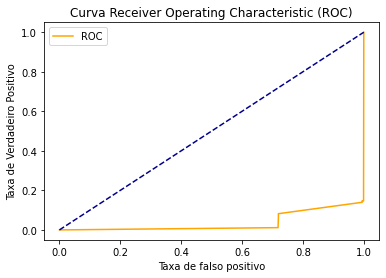

In [13]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'A pontuação ROC AUC é {roc_auc}')

model = gbc
probs = model.predict_proba(X_test)
probs = probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur(fper, tper)

In [ ]:
average_precision_score(y_test, y_pred)

# Avaliando a Precisão com os dados balanceados (Undersampling) usando o modelo Gradient Boosting Classifier (GBC):

## Contando as classificações:

In [4]:
count_class_0, count_class_1 = df.attack.value_counts()
print(f'Ataques: {count_class_0}\nNormal: {count_class_1}')

Ataques: 3925650
Normal: 972780


## Dividindo o dataframe por classificação:

In [5]:
df_class_0 = df[df['attack'] == 0]
df_class_1 = df[df['attack'] == 1]

## Balanceando a base por Undersampling:

Random undersampling:
0    972780
1    972780
Name: attack, dtype: int64


<AxesSubplot:title={'center':'Count (attack)'}>

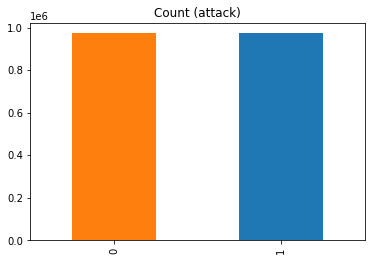

In [6]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random undersampling:')
print(df_test_under.attack.value_counts())

df_test_under.attack.value_counts().plot(kind='bar', title='Count (attack)', color=['#FF7F0E', '#1F77B4'])

## GBC na base Undersampling:

### Dividindo os dados em Treinamento e Teste:

In [24]:
labels_under = df_test_under.columns[:]

X = df_test_under[labels_under]
y = df_test_under['attack']

print(f'Labels under:\n{labels_under}\n\nX:\n{X}\n\ny:\n{y}')

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X, y, test_size=0.2, random_state=50)

Labels under:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

X:
         duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
2287455         0              0       15     9       1032          0     0   


## Dimensionando os dados:

In [25]:
scaler = StandardScaler().fit(X_train_under)
scaler_under = scaler
X_train_transformed_under = scaler_under.transform(X_train_under)
X_test_transformed_under = scaler_under.transform(X_test_under)

print(f'Scaler_under:\n{scaler_under}\n\nX_train_transformed_under:\n{X_train_transformed_under}\n\nX_test_transformed_under:\n{X_test_transformed_under}')

Scaler_under:
StandardScaler()

X_train_transformed_under:
[[-0.11112351 -1.16948199 -0.83787958 ... -0.25292931 -0.25162054
  -1.000365  ]
 [-0.11112351  0.42504154 -0.4844984  ... -0.25292931 -0.25162054
   0.99963513]
 [-0.11112351  0.42504154  1.91849362 ... -0.25292931 -0.25162054
   0.99963513]
 ...
 [-0.11112351 -1.16948199 -0.83787958 ... -0.25292931 -0.25162054
  -1.000365  ]
 [-0.11112351 -1.16948199 -0.83787958 ... -0.25292931 -0.25162054
  -1.000365  ]
 [-0.11112351  0.42504154 -0.20179346 ... -0.25292931 -0.25162054
   0.99963513]]

X_test_transformed_under:
[[ 2.81228452  2.01956507  1.21173126 ... -0.25292931 -0.25162054
   0.99963513]
 [-0.11112351  0.42504154 -0.20179346 ... -0.25292931 -0.25162054
   0.99963513]
 [-0.11112351  0.42504154 -0.20179346 ... -0.25292931 -0.25162054
   0.99963513]
 ...
 [-0.11112351 -1.16948199 -0.83787958 ... -0.25292931 -0.25162054
  -1.000365  ]
 [-0.11112351 -1.16948199 -0.83787958 ... -0.25292931 -0.25162054
  -1.000365  ]
 [-0.1111235

## Treinando o modelo com o Gradient Boosting Classifier definindo os hiperparâmetros e ajustando (.fit) os dados de treino:

In [14]:
# Hiperparâmetros:
# learning_rate => controla a rapidez com que o modelo aprende. Quanto menor a taxa, mais lento o modelo aprende, porém, mais robusto e eficiente fica e evita overfitting.
# n_estimators => número de árvores usadas no modelo.
# Quanto menor o learning_rate, maior deve ser o n_estimators, porém, se não for ajustado corretamente, pode ocorrer overfitting.

gbc_under = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=5).fit(X_train_transformed_under, y_train_under)

# Método score retorna a precisão média nos dados de teste e rótulos fornecidos.
gbc_under.score(X_test_under, y_test_under)
gbc_under.predict(X_test_under)

NameError: name 'X_train_transformed_under' is not defined

## Treinando o modelo com o GBC:

In [ ]:
GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=0.05, loss='deviance', max_depth=3, max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=50, n_iter_no_change=None, random_state=20, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False)

## Matriz de Confusão:

Matriz de Confusão:
 [[194840      0]
 [     0 194272]]


Text(0.5, 0, 'Previsto')

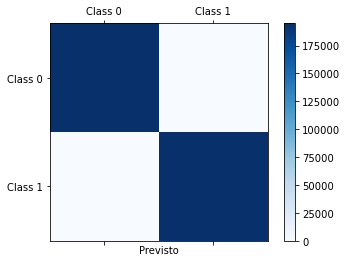

In [27]:
y_pred_under = gbc_under.predict(X_test_transformed_under)
conf_mat_under = confusion_matrix(y_pred_under, y_test_under)
print('Matriz de Confusão:\n', conf_mat_under)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat_under, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Previsto')

### Calculando a Precisão, Verdadeiro Negativo (TN), Falso Positivo (FP), Falso Negativo (FN) e Verdadeiro Positivo (TP):

In [28]:
#print('964.925 classificações corretas vs 14.761 classificações erradas')
# Casos Positivos Corretamente Identificados (CPCI) = TP
# Casos Positivos Previstos (CPP) = TP + FP
# Casos Positivos Reais (CPR) = TP + FN

threshold = 0.5
y_pred_class_under = y_pred_under > threshold
tn, fp, fn, tp = confusion_matrix(y_test_under, y_pred_class_under).ravel()
accuracy = (tp + tn) / (tp + fp + fn + tn)

CPCI = tp
CPP = tp + fp
CPR = tp + fn
precisao = CPCI / CPP
recall = CPCI / CPR
f1score = 2 * ((precisao * recall) / (precisao + recall))
f1score_ = f1_score(y_test_under, y_pred_under)

print(f'A precisão é: %.2f%%' % (precisao * 100))
print(f'A taxa de Recall é: %.2f' % recall)
print(f'A quantidade de Casos Positivos Corretamente Identificados é {CPCI}')
print(f'F1_Score: {f1score}')
print(f'F1_Score: {f1score_}')
print(f'A precisão é %.2f%% \n Verdadeiro-negativo {tn}\n Falso-positivo {fp} \n Falso-negativo {fn} \n Verdadeiro-positivo {tp}' % (accuracy * 100))

A precisão é: 100.00%
A taxa de Recall é: 1.00
A quantidade de Casos Positivos Corretamente Identificados é 194272
F1_Score: 1.0
F1_Score: 1.0
A precisão é 100.00% 
 Verdadeiro-negativo 194840
 Falso-positivo 0 
 Falso-negativo 0 
 Verdadeiro-positivo 194272


### Calculando a pontuação ROC AUC e curva ROC:

In [29]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falso positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva Receiver Operating Characteristic (ROC)')
    plt.legend()
    plt.show()

A pontuação ROC AUC é 1.0


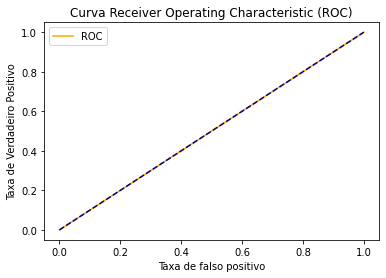

In [30]:
roc_auc_under = roc_auc_score(y_test_under, y_pred_under)
print(f'A pontuação ROC AUC é {roc_auc_under}')

model = gbc_under
probs = model.predict_proba(X_test_under)
probs = probs[:,1]
fper, tper, thresholds = roc_curve(y_test_under, probs)
plot_roc_cur(fper, tper)

# Testando a Precisão com os dados balanceados (Oversampling) usando o Classificador Gradient Boosting:

## Contando as classificações:

In [ ]:
count_class_0, count_class_1 = df.attack.value_counts()
print(f'Ataques: {count_class_0}\nNormal: {count_class_1}')

## Dividindo o dataframe por classificação:

In [ ]:
df_class_0 = df[df['attack'] == 0]
df_class_1 = df[df['attack'] == 1]

## Balanceando a base por Oversampling:

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random Oversampling:')
print(df_test_over.attack.value_counts())

df_test_over.attack.value_counts().plot(kind='bar', title='Count (attack)')

## GBC na base Oversampling:

### Dividindo os dados em Treinamento e Teste:

In [ ]:
labels_over = df_test_over.columns[:]

X = df_test_over[labels_over]
y = df_test_over['attack']

print(f'Labels over:\n{labels_over}\n\nX:\n{X}\n\ny:\n{y}')

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X, y, test_size=0.2, random_state=1)